# Q1 Beta-Binomial

## Inference
Let $\alpha_i = g_i$ and $\beta_i = c_i - g_i$. Then we can estimate prior as 
$\text{Beta}(\alpha^*, \beta^*)$ as following.
$$
    \alpha^* = \frac{1}{N}\sum_i^N g_i, ~~~~~~ \beta^* = \frac{1}{N}\sum_i^N (c_i - g_i)
$$

Denote $\hat\alpha_i = \alpha^* + \alpha_i$, and $\hat\beta_i = \beta^* + \beta_i$. Then
$
    P(\theta_i| c_i, g_i) =  \text{Beta}(\hat\alpha_i, \hat\beta_i) 
$

To maximaze a posterior probability, we take a mode, which fortunately has close form
$
    \widehat\theta_i = \frac{\hat\alpha_i - 1}{\hat\alpha_i + \hat\beta_i - 2}
$

## Certainty
To estimate the certainty of of our estimation we have two options.
### Easy way 

Easy way is to compute mean and variance
$$
    \mu_i = \frac{\hat\alpha_i}{\hat\alpha_i + \hat\beta_i}
    ~~~~~~~~
    \sigma_i^2 = \frac{\hat\alpha_i \hat\beta_i}
                  {(\hat\alpha_i + \hat\beta_i)^2(\hat\alpha_i + \hat\beta_i + 1)}
$$
And then use chebyshev equation to define the interval where $\theta_i$ lies with required probability.

### Clasical way
Computationaly hard way: To compute a credible interval, which is hasn't close form for my best knowledge. 


The code bellow do all described above

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Define some simulation parameters and then plot histogram of ground truth $\theta_i$ and distribution from wich they was drown

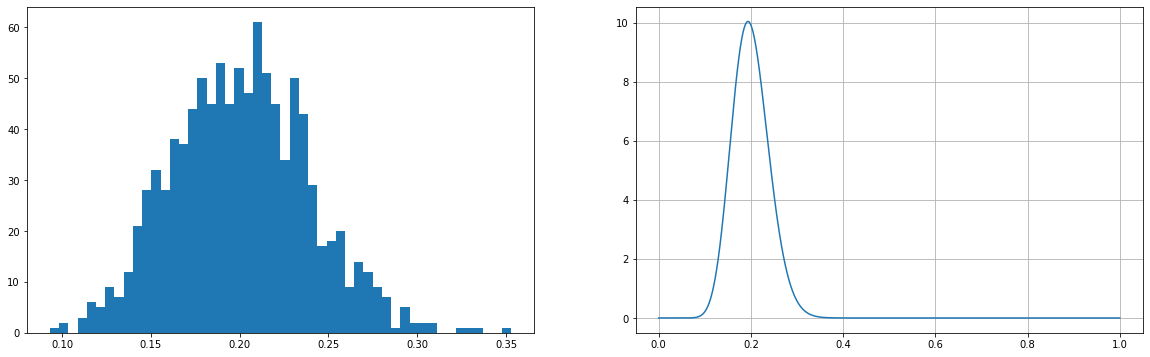

In [2]:
a_gt = 20
b_gt = 100 - a_gt

N = 1000
p = stats.beta.rvs(a=a_gt,b=b_gt,size=N)
n = np.random.randint(5, 100, N)
g = np.random.binomial(n, p)

t = np.linspace(0, 1, 1000)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.hist(p, bins=50)
plt.subplot(1,2,2)
plt.plot(t, stats.beta.pdf(t, a=a_gt, b=b_gt))
plt.grid(True)
plt.show()

Then compare four ways to estimate $\theta_i$ (just for curiosity)

- Naive (clasical statistic), i.e. take the ratio $G_i/C_i$
- uniform prior. I.e. $\alpha^* = 1, \beta^* = 1$
- simple prior. as described in the first cell. I called it simple, since I think there are more elegant ways to obtain an empirical prior. 
- ground truth prior, to see what is a best that we can get if we guess a good prior. 

In [3]:
def bayes_inf(g, n, prior):
    """
    inference: computes mode of posterior probability (MAP) 
    """
    a,b = prior
    return (a + g - 1)/(a + b + n - 2)

q_naive = g/n

prior_uniform = (1,1)
q_bayes_uniform = bayes_inf(g, n, prior_uniform)

prior_simple = (np.mean(g), np.mean(n - g))
q_bayes_simple = bayes_inf(g, n, prior_simple)

prior_gt = (a_gt, b_gt)
q_bayes_gt = bayes_inf(g, n, prior_gt)

Finaly, lets plot the error distribution. The title contains MSE and error's STD, while plots show error histogram. 

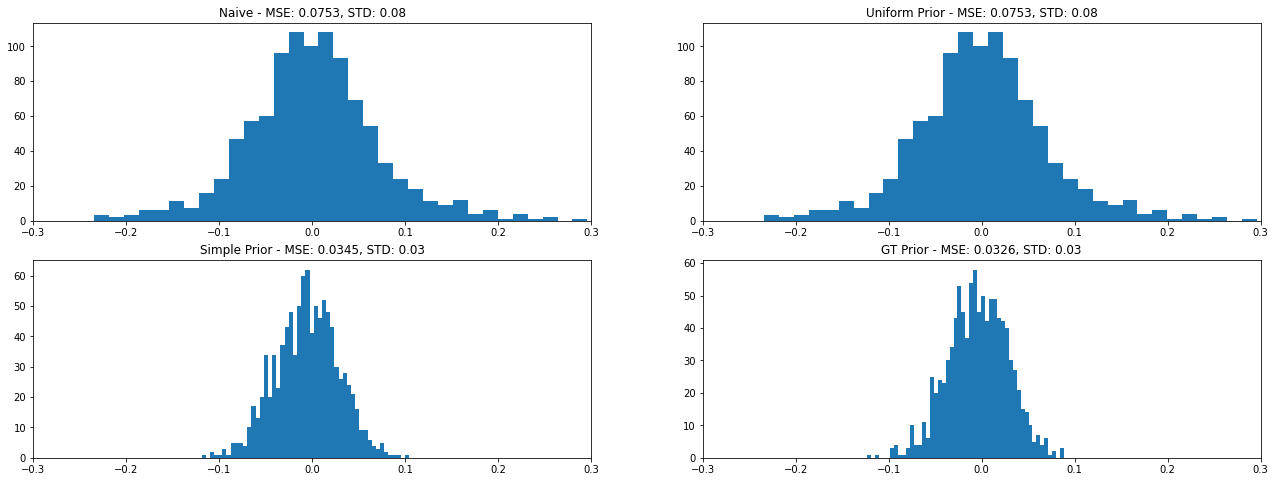

In [4]:
def show_error(pred, gt, title='Error'):
    err = pred - gt
    mse = np.sqrt((err ** 2).mean())
    std = err.std()
    plt.title('%s - MSE: %.4f, STD: %.2f' % (title, mse, std))
    plt.hist(err, bins=50)
    plt.xlim([-0.3, 0.3])
    



plt.figure(figsize=(22,8))
plt.subplot(2,2,1)
show_error(q_naive, p, 'Naive')

plt.subplot(2,2,2)
show_error(q_bayes_uniform, p, 'Uniform Prior')

plt.subplot(2,2,3)
show_error(q_bayes_simple, p, 'Simple Prior')

plt.subplot(2,2,4)
show_error(q_bayes_gt, p, 'GT Prior')
plt.show()

Compute credible interval for probability 5% each side and see how its length correlate with 'n' (number of trials)

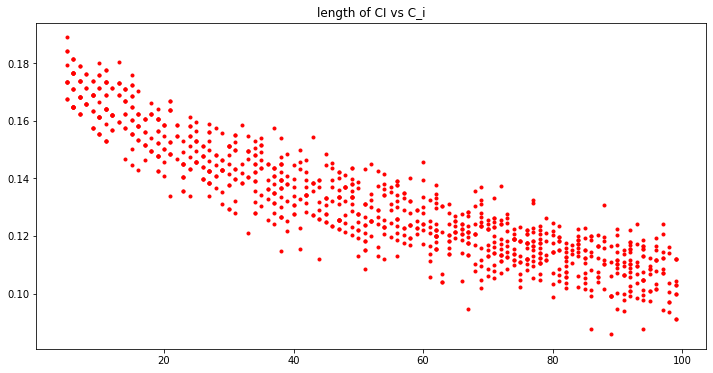

In [5]:
lo, hi = stats.beta.interval(0.90, a=prior_simple[0] + g, b = prior_simple[1]+n-g)

plt.figure(figsize=(12, 6))
plt.title('length of CI vs C_i')
plt.plot(n, hi - lo, 'r.')
plt.show()